In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np


import h2o
from h2o.automl import H2OAutoML

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


In [2]:
import os
import pandas as pd
from scipy.io import arff


# Path to the directory containing your CSV files
directory_path = '/home/danish/Datasets/ICS/multiclass'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.arff')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df , _ = arff.loadarff(file_path)
    df = pd.DataFrame(df)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df
data
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982443,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-119.696613,131308.7150,120.326867,131258.5685,0.309397,131358.8615,-116.235948,337.65484,122.045740,344.24680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78373,-119.742450,131333.7883,120.286760,131308.7150,0.269290,131383.9348,-116.510968,338.02106,121.885312,344.79613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78374,-119.765368,131383.9348,120.258112,131333.7883,0.246372,131434.0813,-116.740151,339.66905,121.696236,345.52857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78375,-119.828393,131484.2279,120.200816,131434.0813,0.183346,131509.3012,-117.536562,342.41570,121.054523,347.35967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


In [3]:
# List of bad or constant columns 
columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# Remove specified columns
data = data.drop(columns=columns_to_drop)

In [4]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:S,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982443,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-119.696613,131308.7150,120.326867,131258.5685,0.309397,131358.8615,-116.235948,337.65484,122.045740,344.24680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78373,-119.742450,131333.7883,120.286760,131308.7150,0.269290,131383.9348,-116.510968,338.02106,121.885312,344.79613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78374,-119.765368,131383.9348,120.258112,131333.7883,0.246372,131434.0813,-116.740151,339.66905,121.696236,345.52857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78375,-119.828393,131484.2279,120.200816,131434.0813,0.183346,131509.3012,-117.536562,342.41570,121.054523,347.35967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


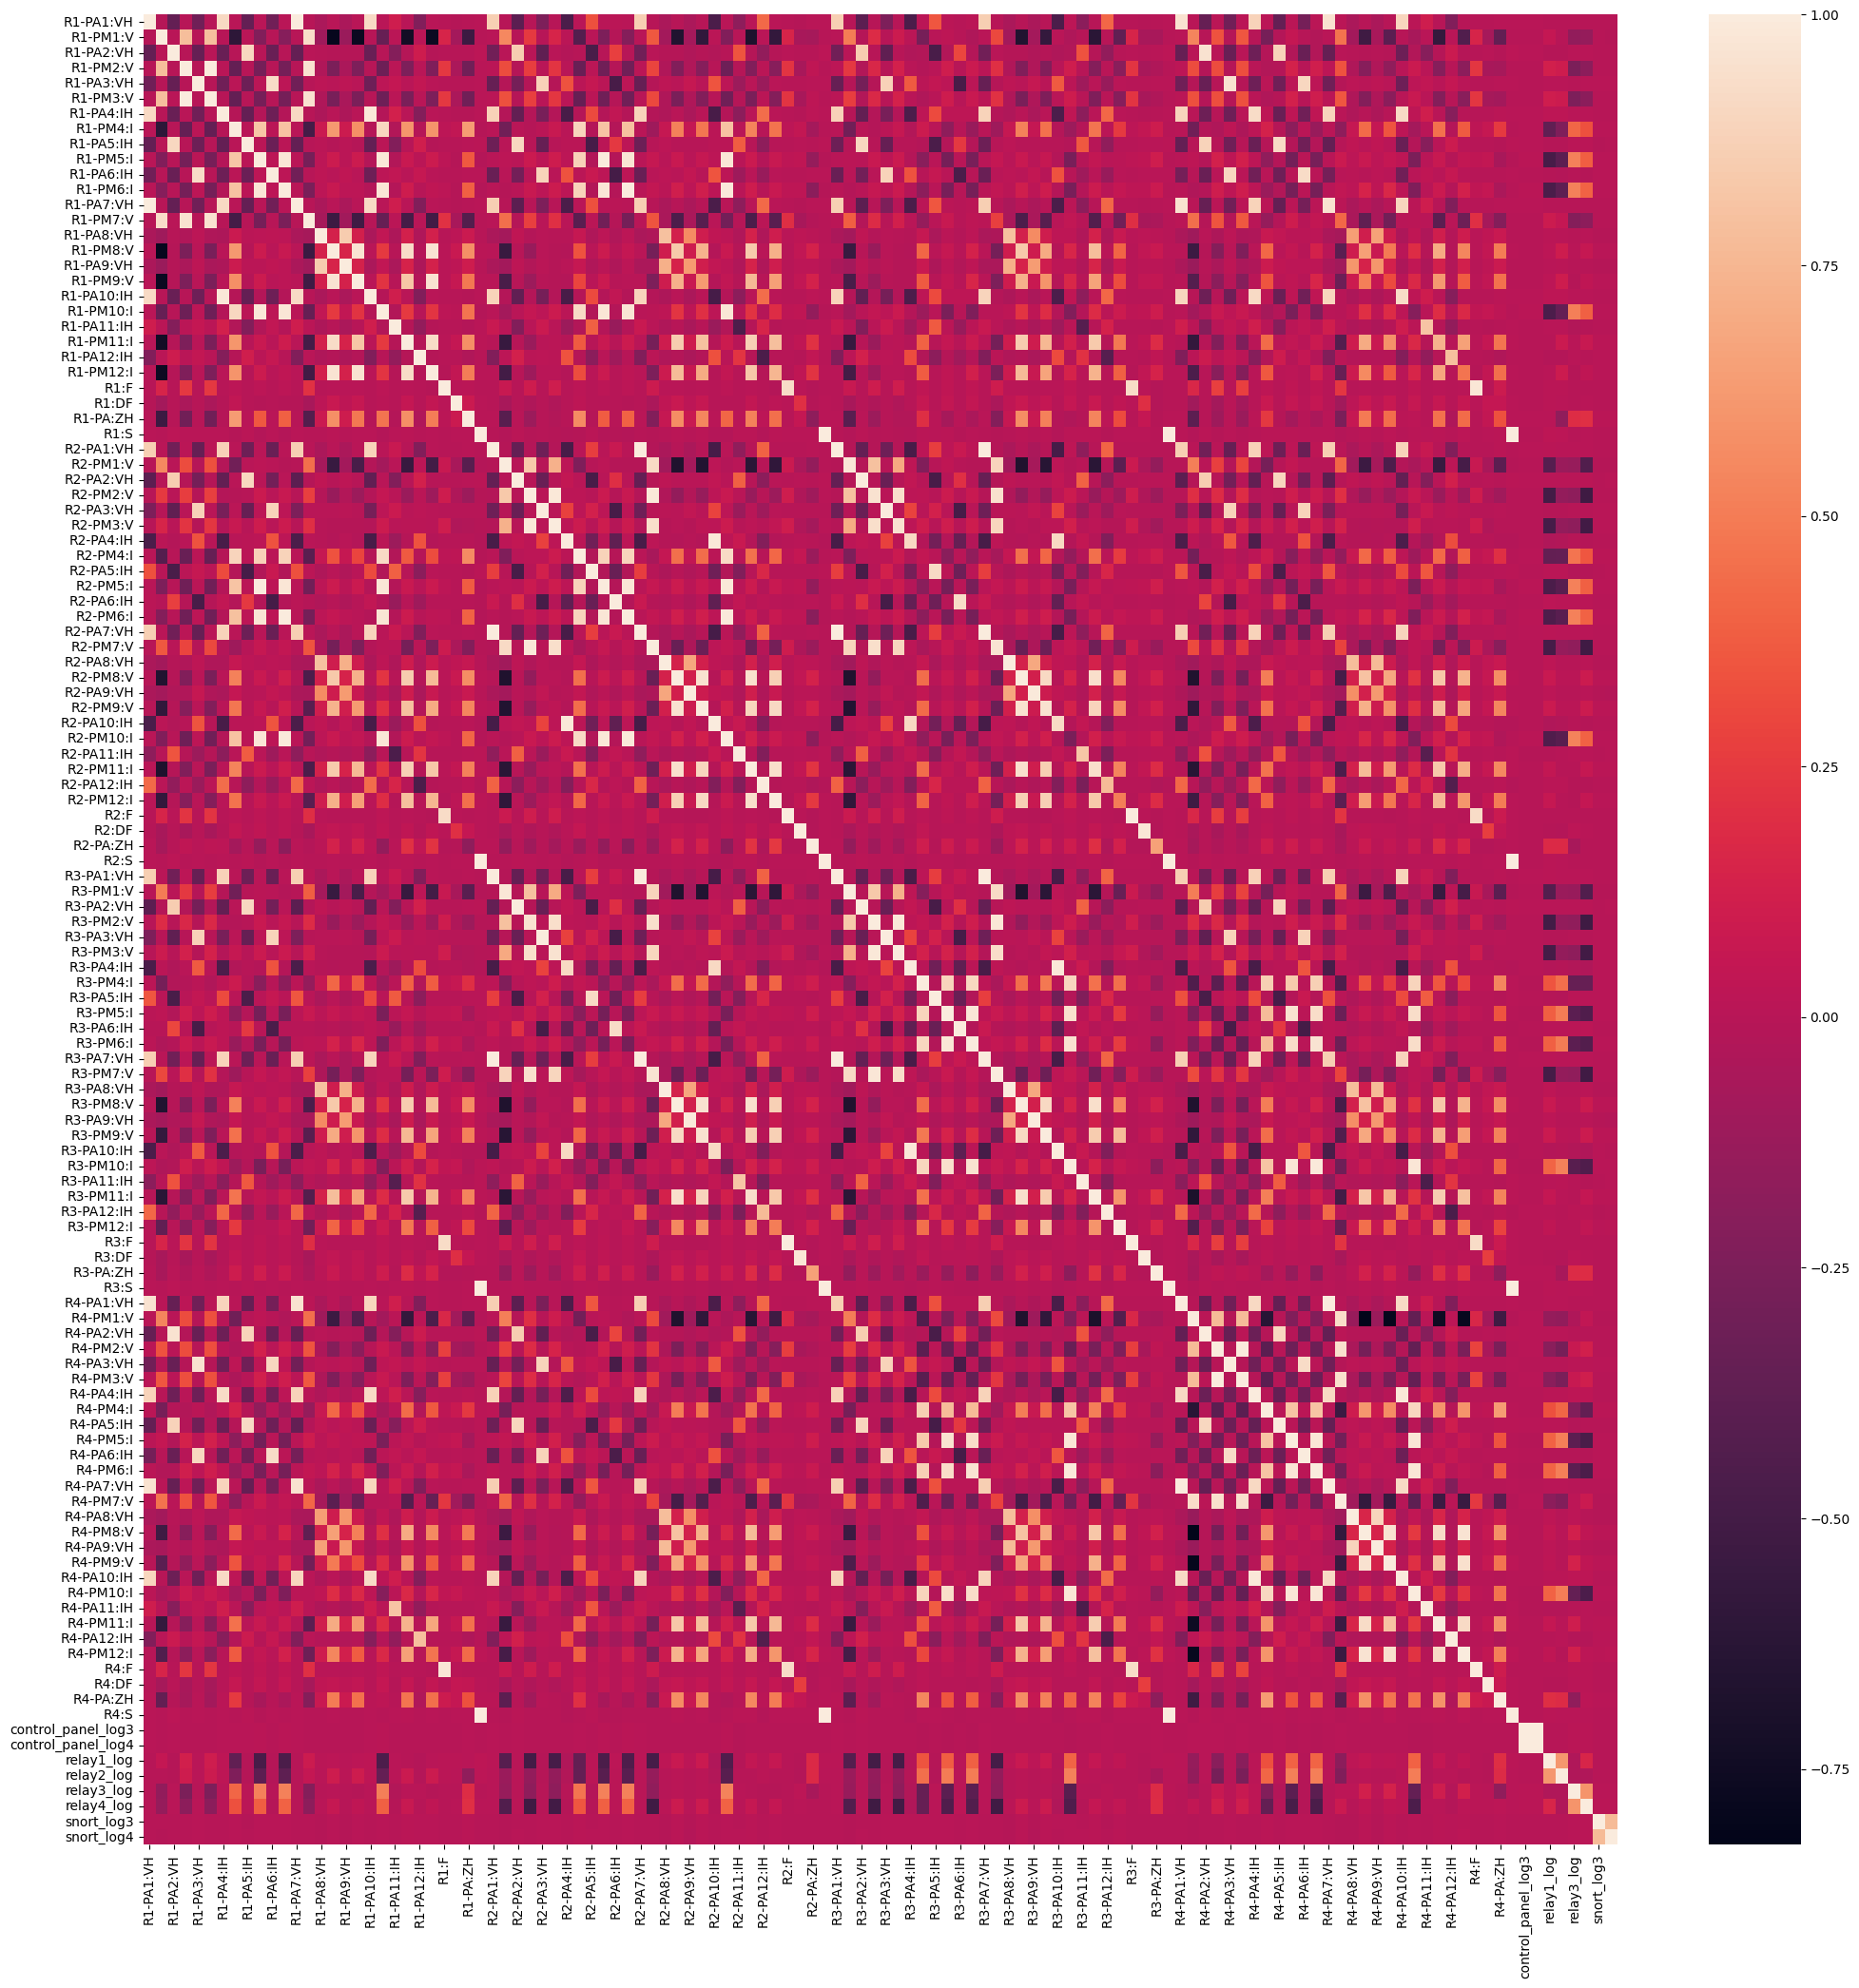

In [5]:

corr = pd.DataFrame(data.drop('marker', axis=1)).corr()

plt.figure(figsize=(25,25))

sns.heatmap(corr)

plt.show()

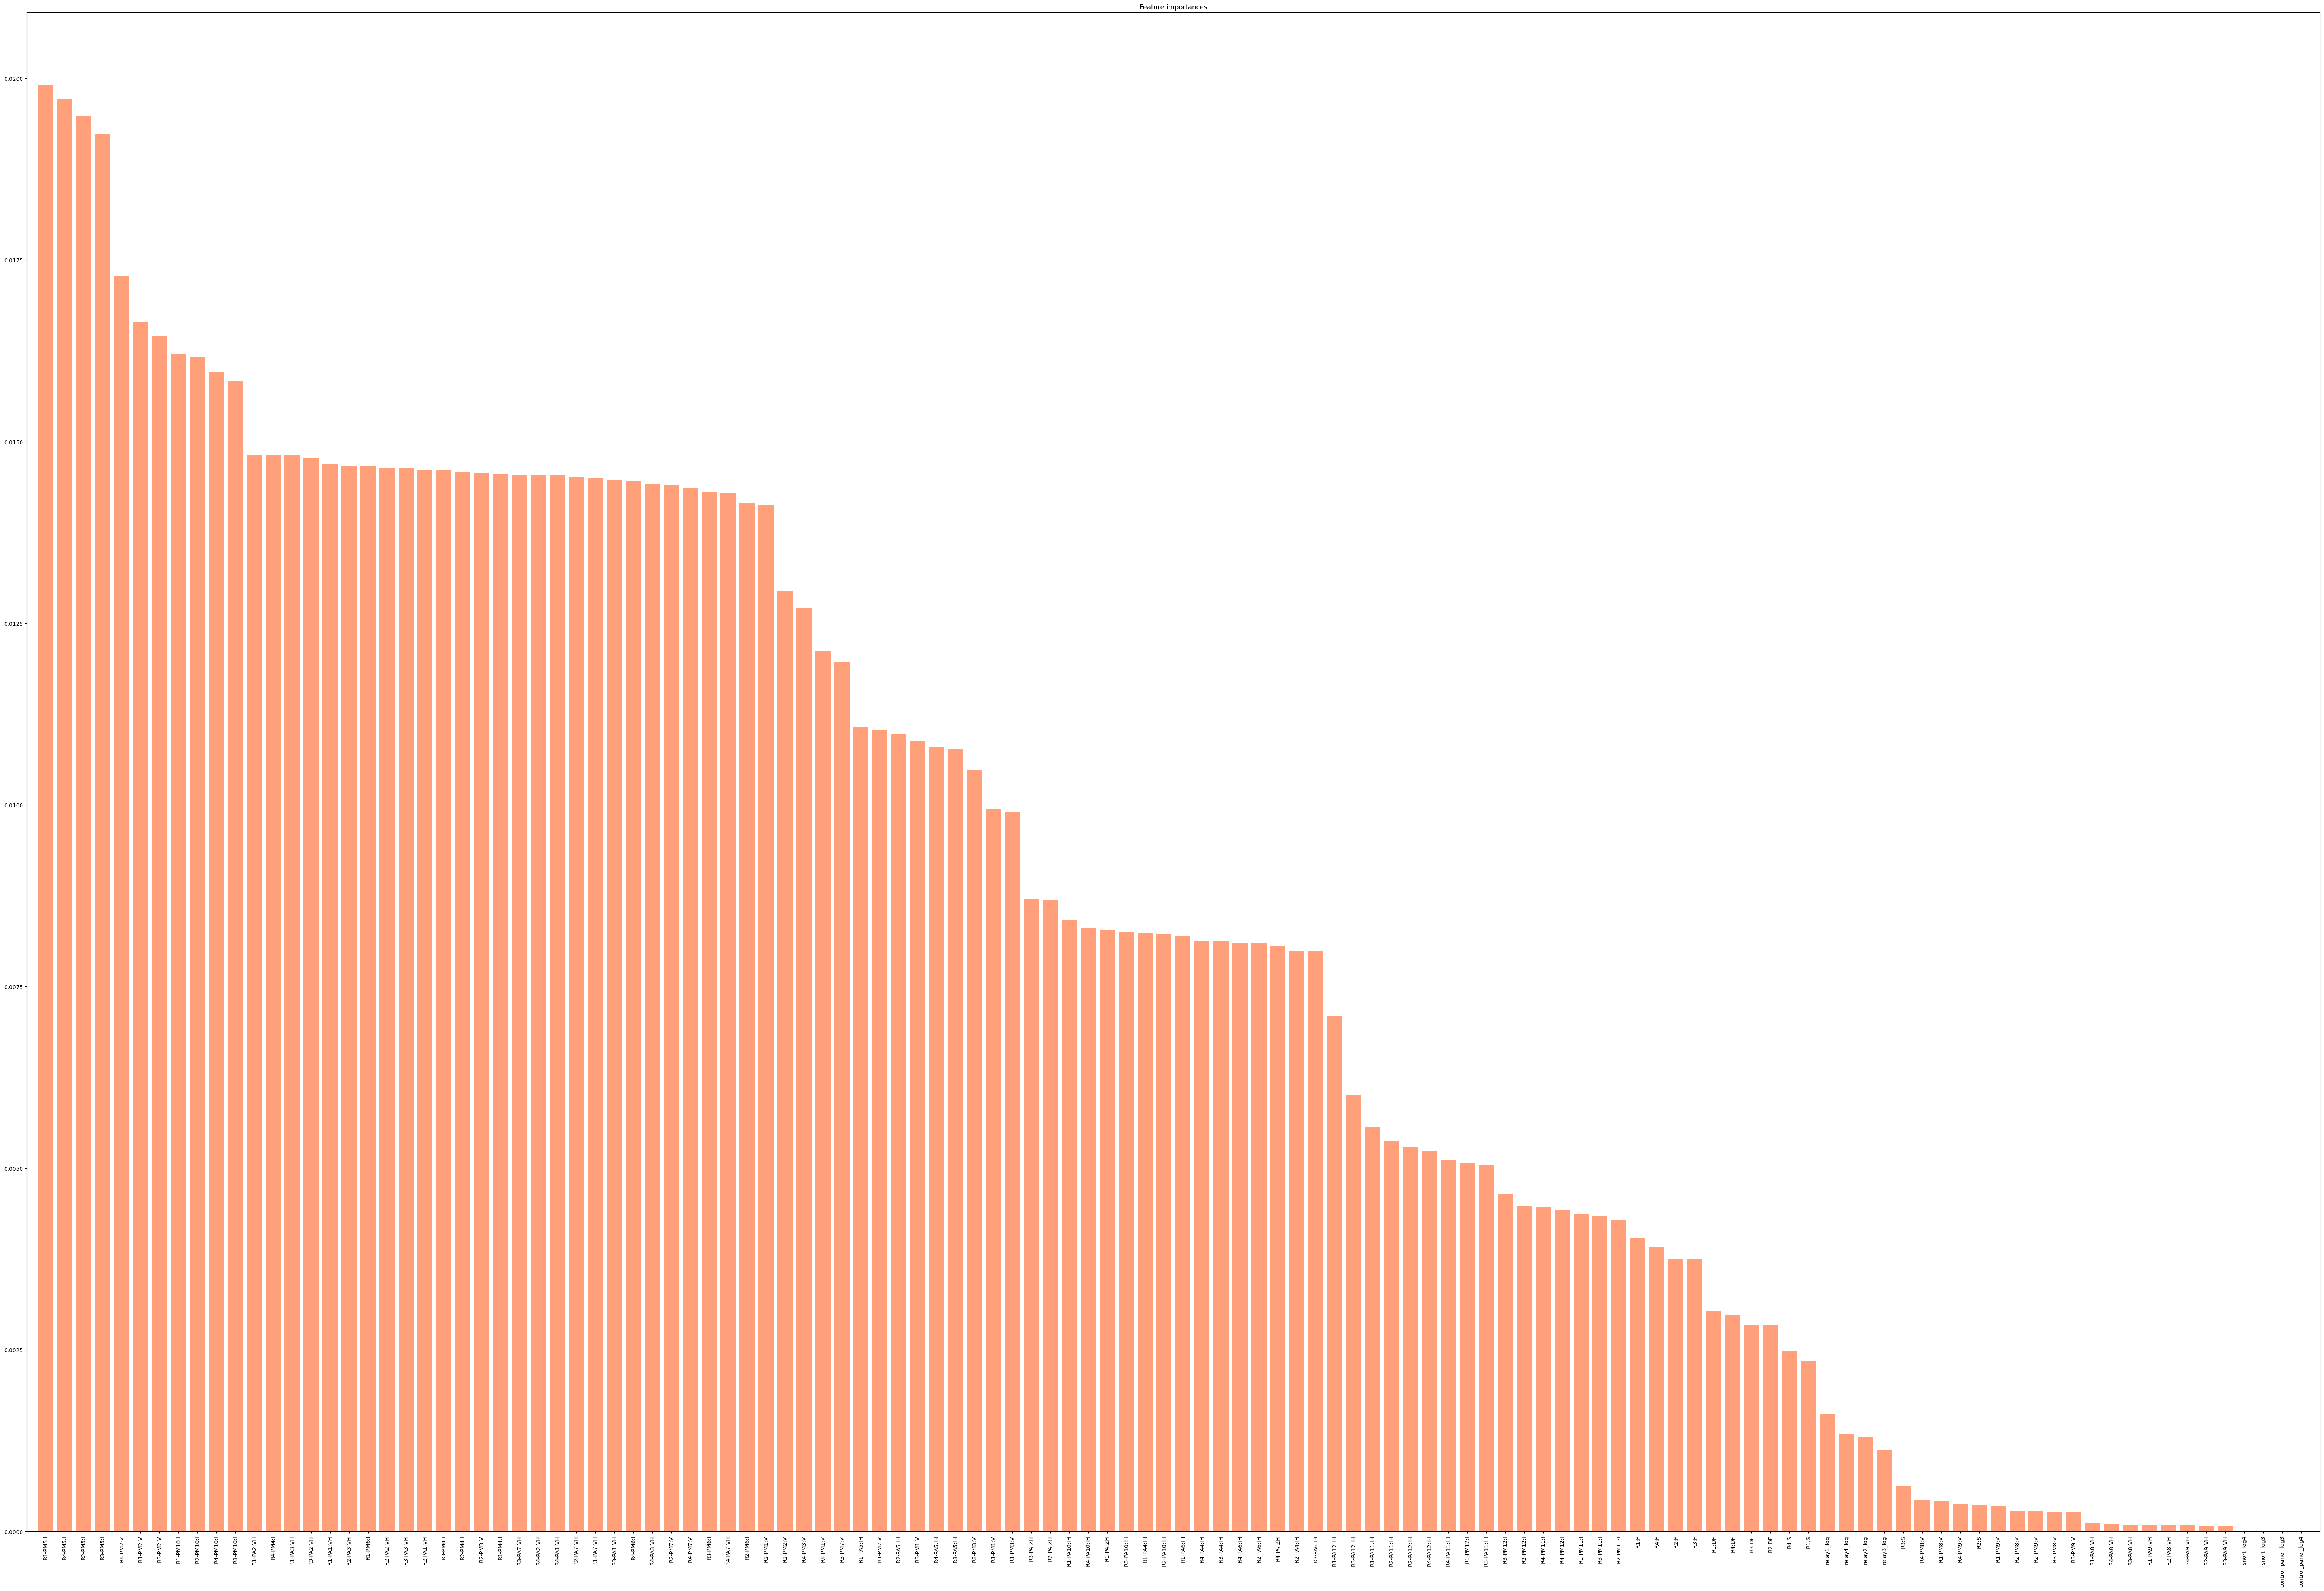

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('marker', axis=1), data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
plt.show()

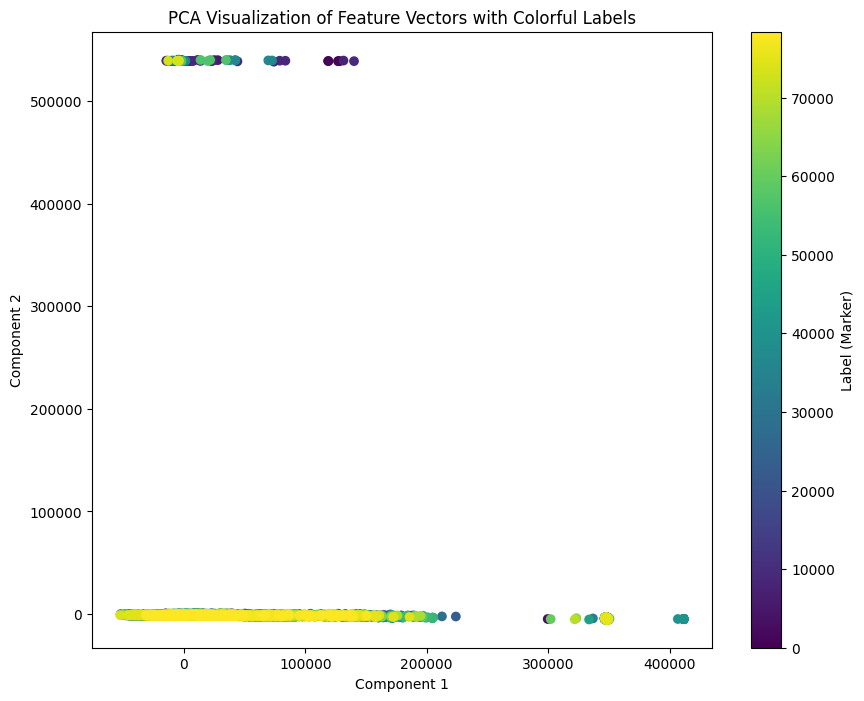

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


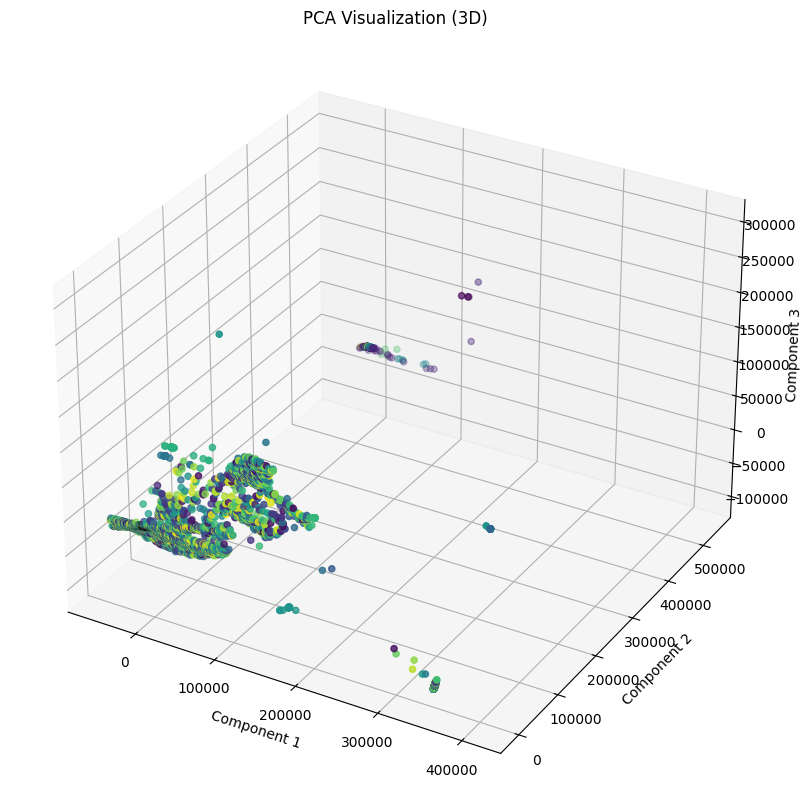

In [8]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [9]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('marker', axis=1), data['marker'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('marker', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(78377, 55)


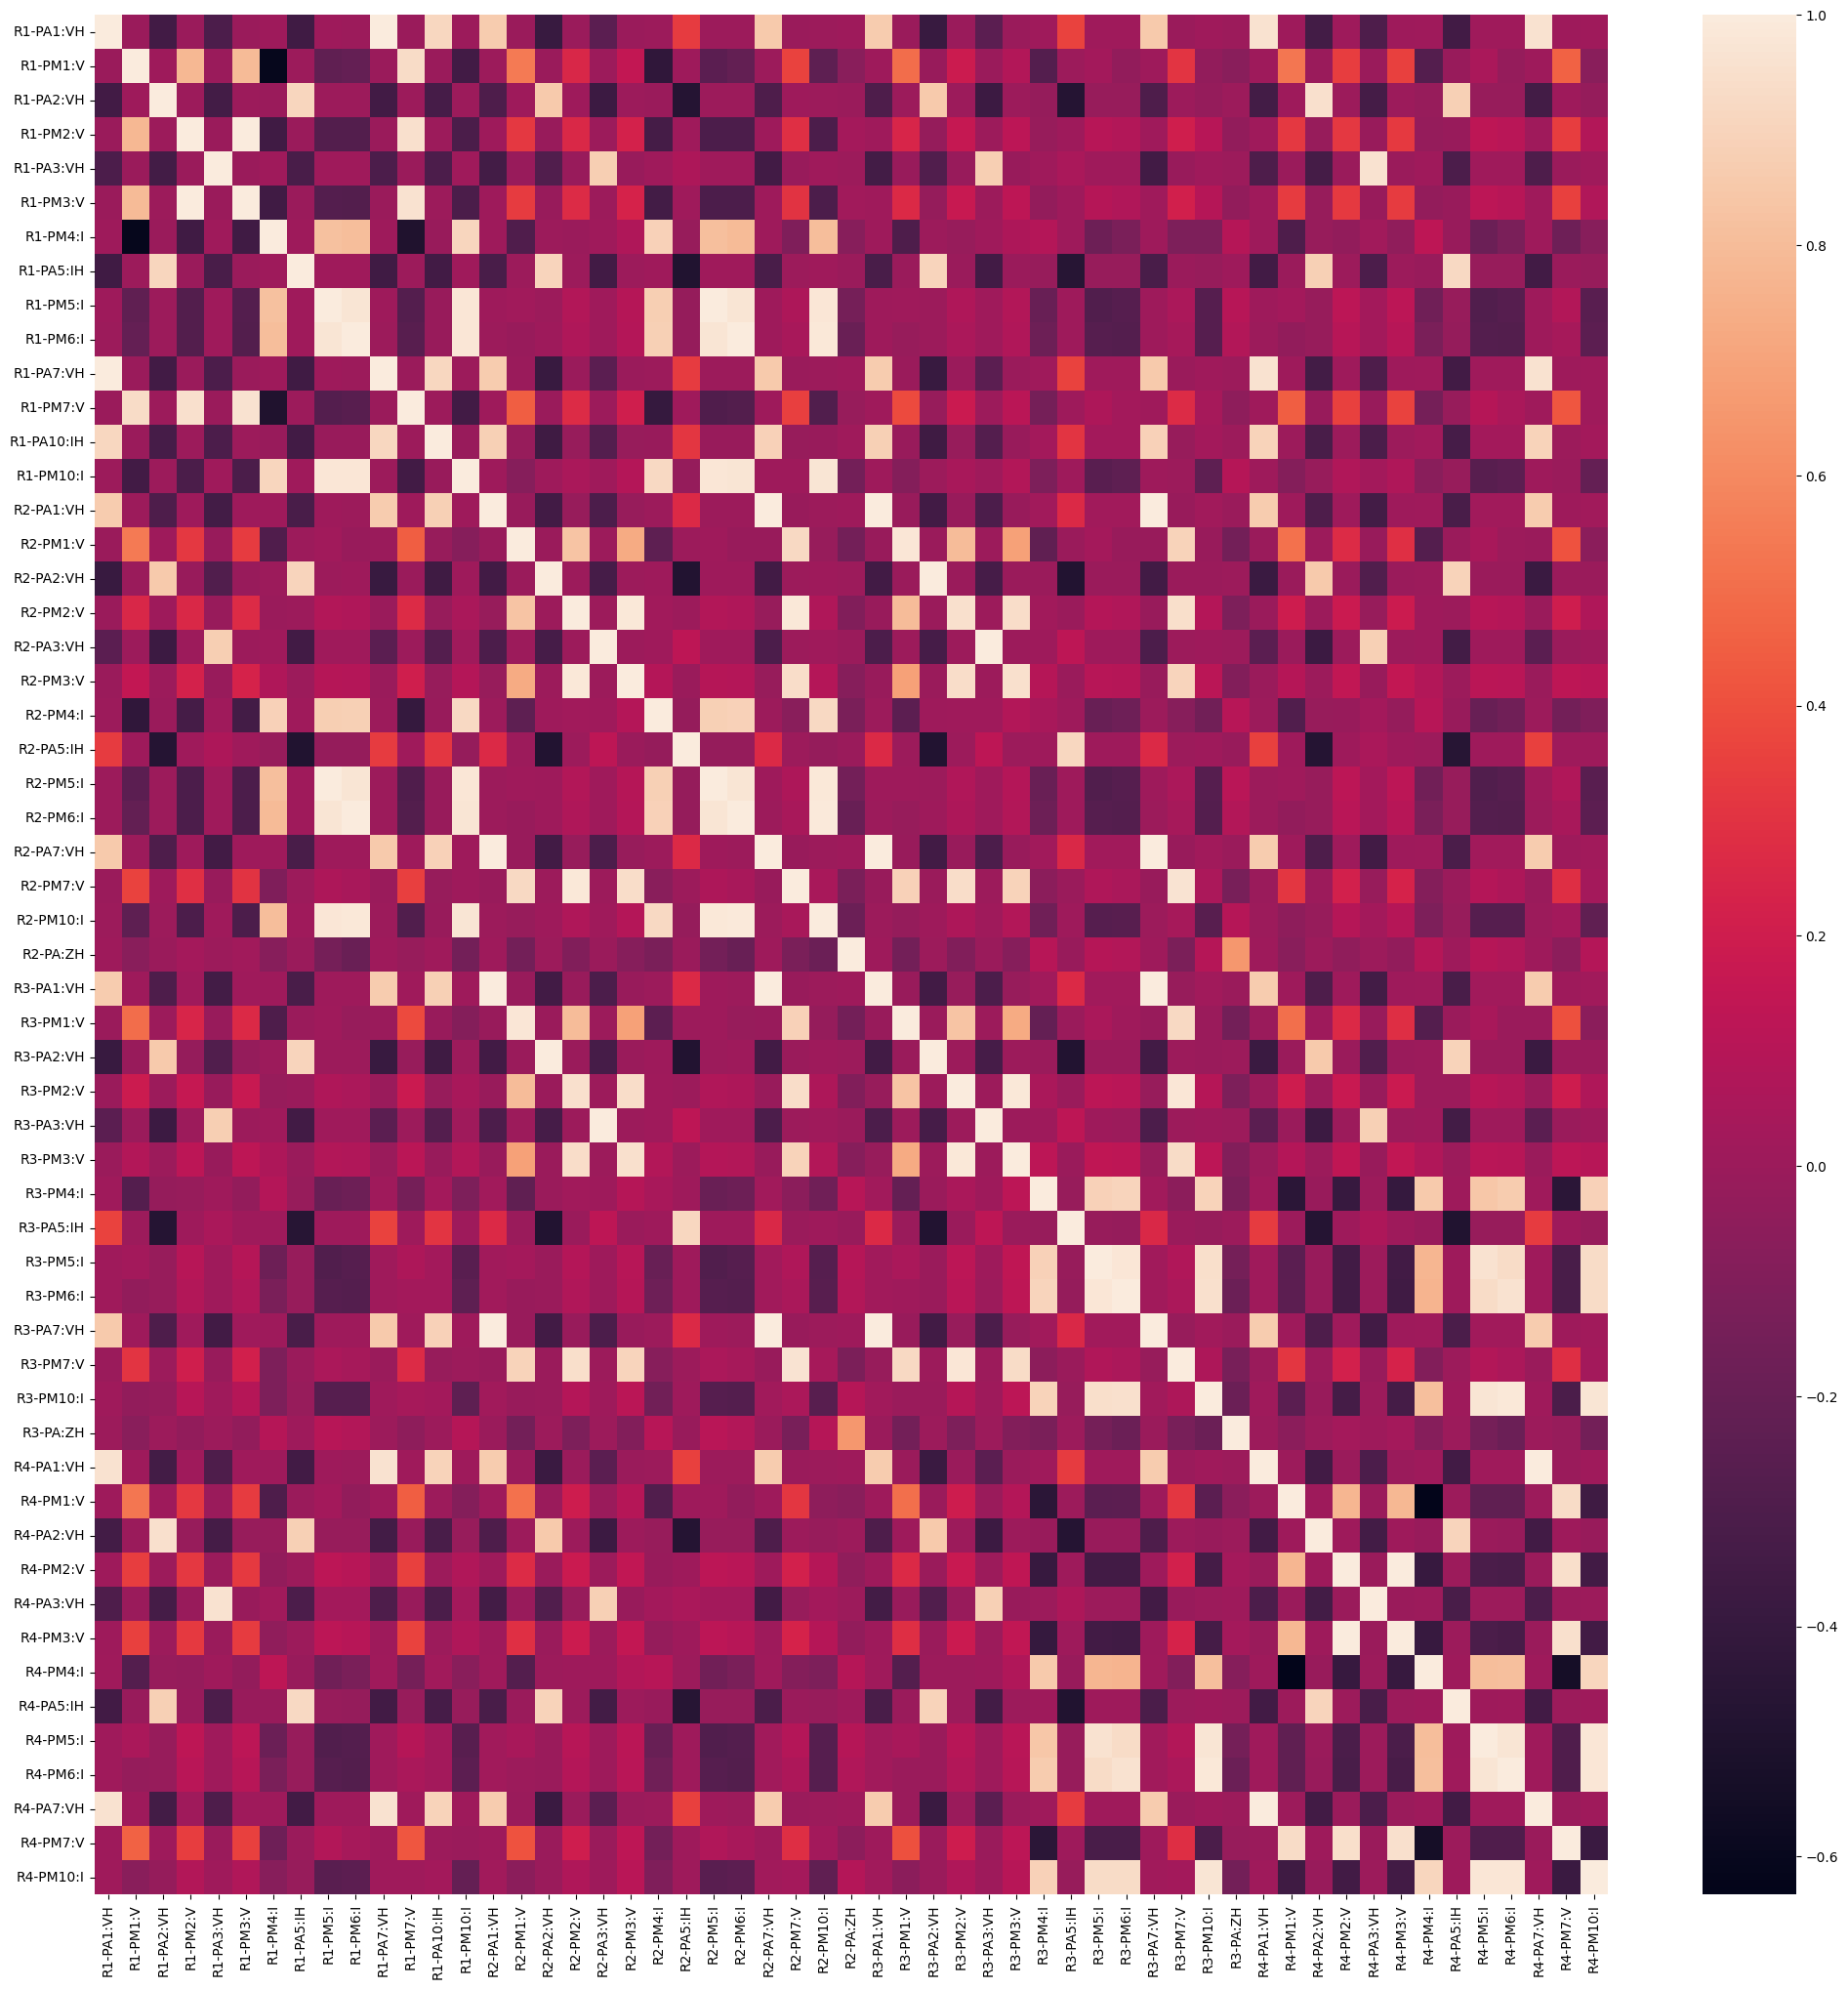

In [10]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(25,25))

sns.heatmap(corr)

plt.show()

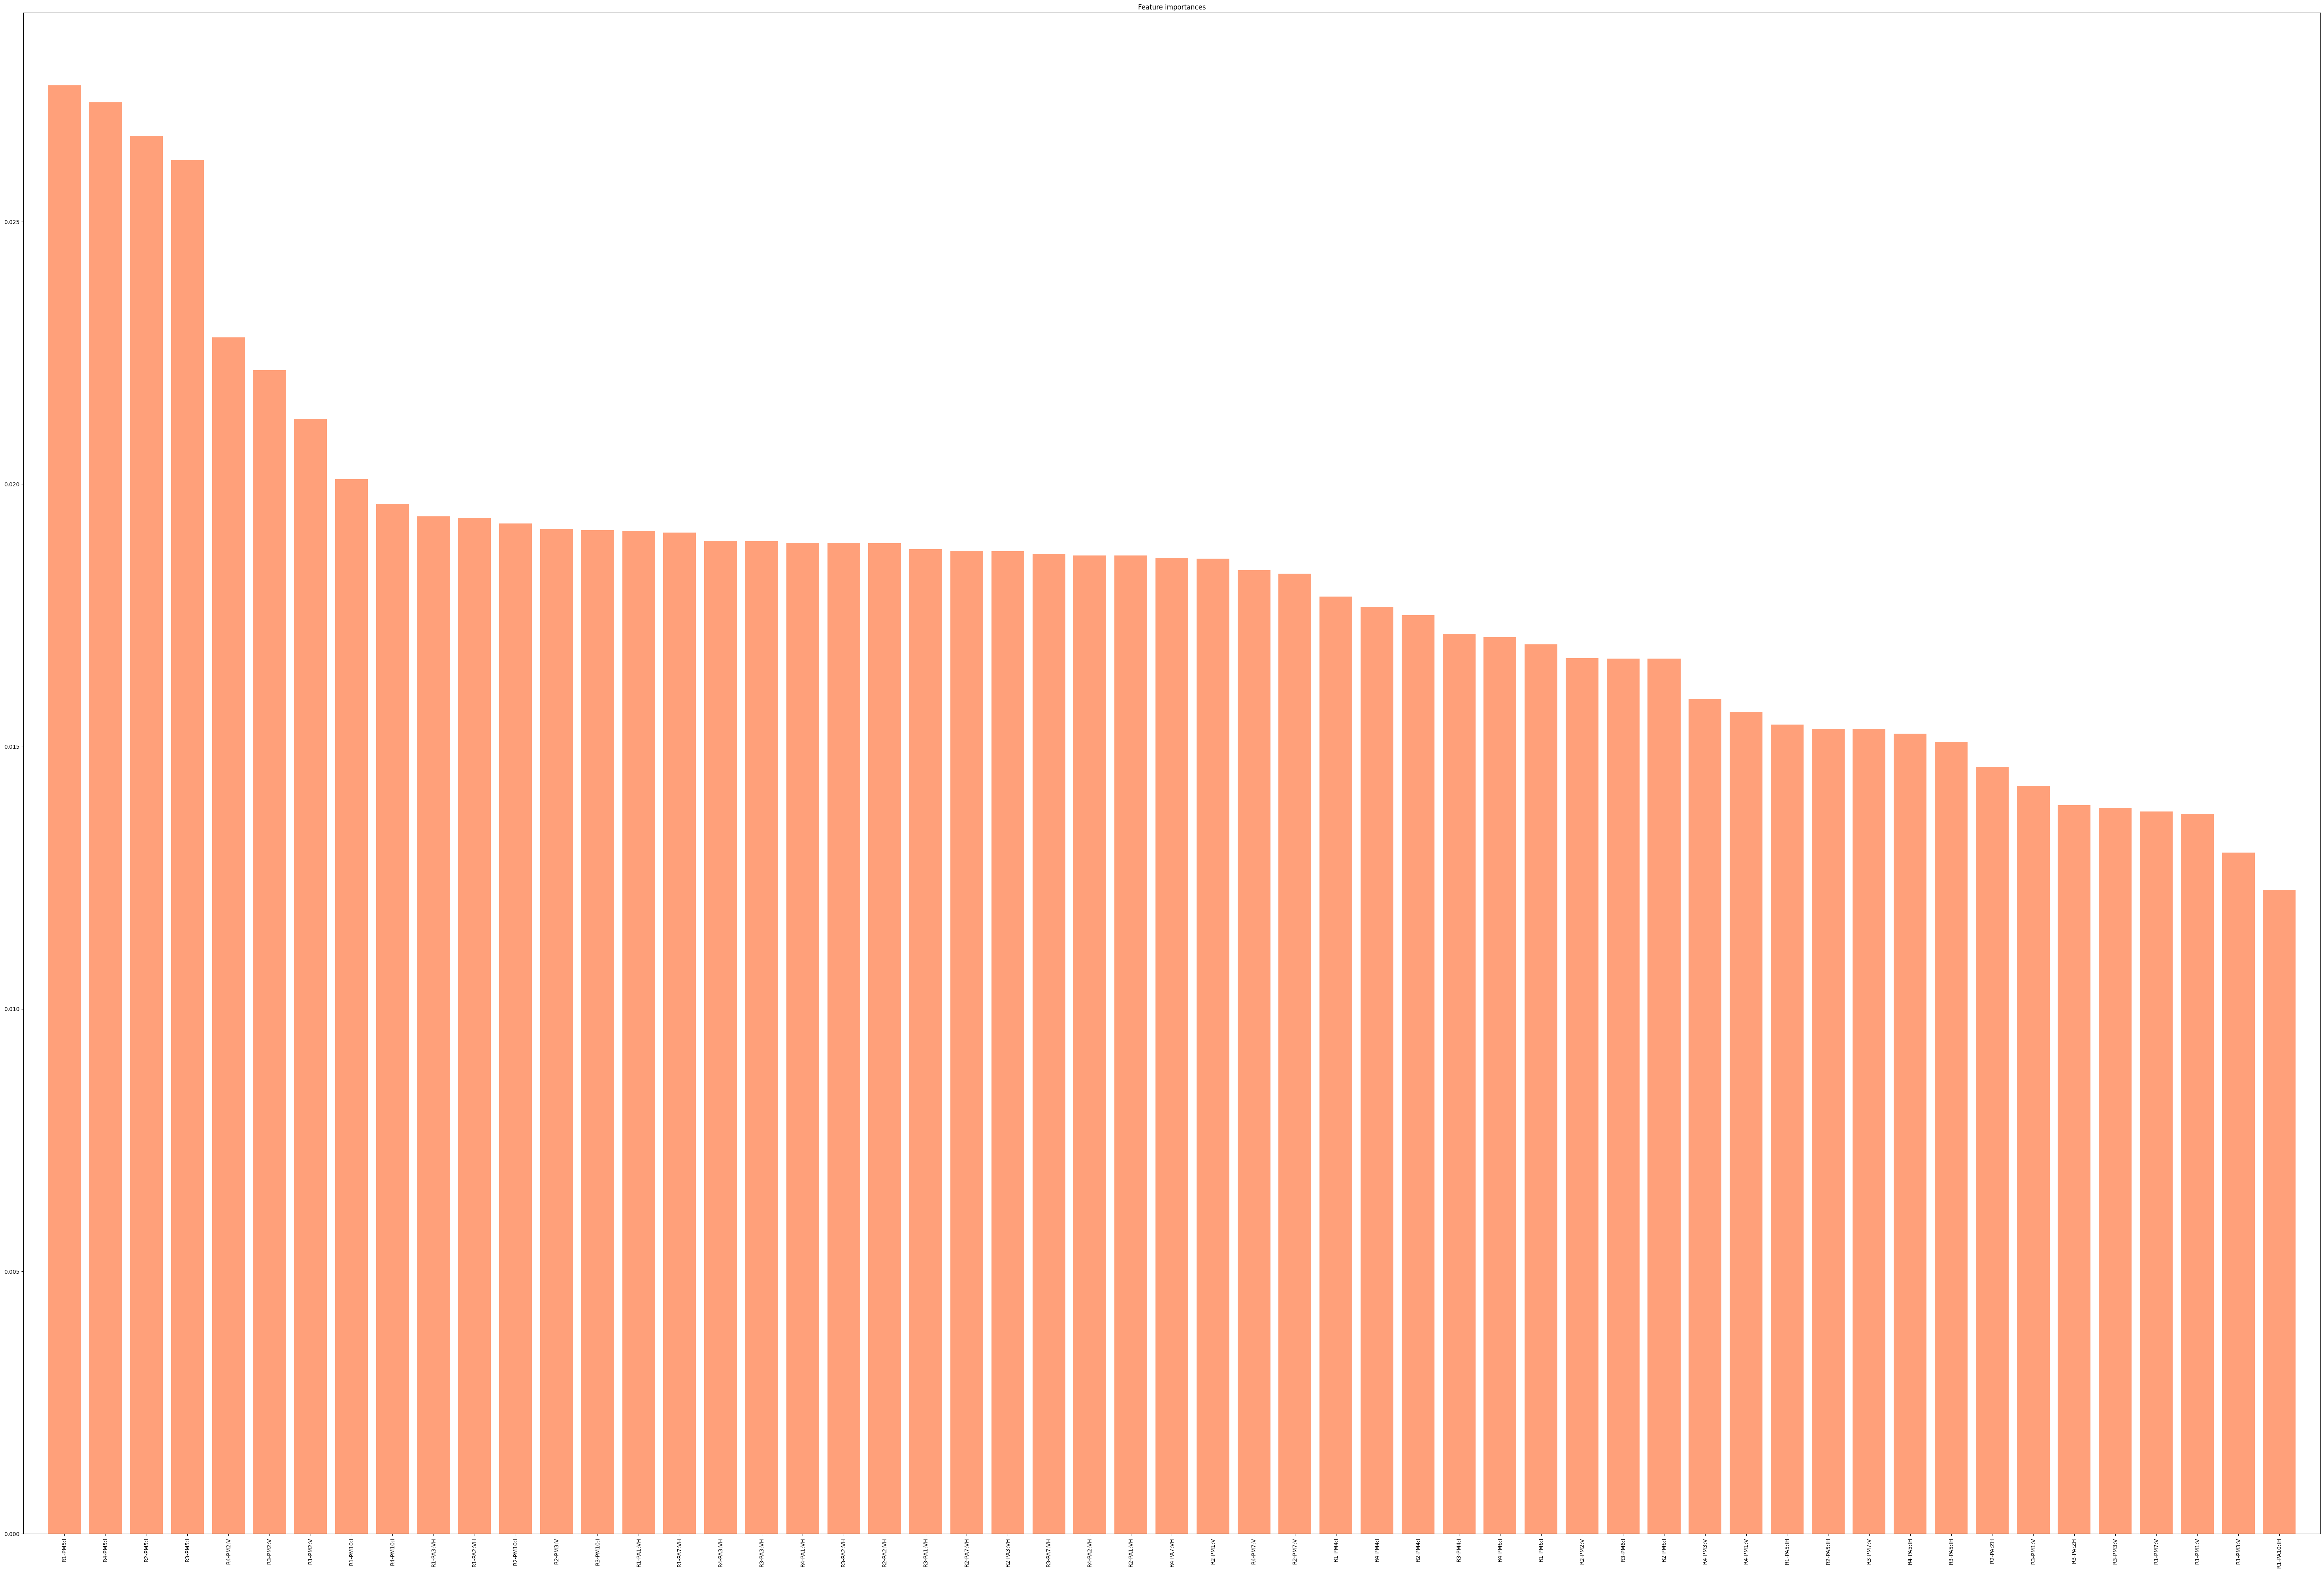

In [11]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [12]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PM6:I,...,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PM10:I
0,0.553942,-1.111111,-0.307364,-0.847826,-1.220507,-1.133333,0.680825,-0.316417,0.848335,0.669915,...,-1.380526,-1.221582,-1.330498,0.687124,-0.314527,0.857429,0.667933,0.554220,-1.343012,0.729175
1,0.592635,-0.266667,-0.275842,-0.021739,-1.178308,-0.266667,-0.759709,-0.252698,-0.675709,-0.771011,...,-0.651915,-1.179441,-0.501663,-0.773709,-0.250165,-0.676788,-0.778032,0.593023,-0.545599,-0.749467
2,0.615654,0.600000,-0.257106,0.826087,-1.153322,0.577778,-0.690534,-0.234041,-0.684340,-0.691839,...,0.095870,-1.154378,0.348983,-0.700239,-0.231428,-0.682974,-0.699739,0.616032,0.272799,-0.699114
3,0.614600,0.511111,-0.257881,0.739130,-1.154396,0.488889,-0.671117,-0.235318,-0.681874,-0.671133,...,0.019174,-1.155450,0.239926,-0.684321,-0.232908,-0.678025,-0.677720,0.615045,0.188861,-0.685605
4,0.614192,0.488889,-0.258323,0.717391,-1.154914,0.488889,-0.663835,-0.235898,-0.680641,-0.662607,...,0.000000,-1.156005,0.239926,-0.678198,-0.233923,-0.676788,-0.665486,0.614569,0.167877,-0.678236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-0.539016,-0.333333,0.541998,-0.086956,-0.084583,-0.355556,-0.271845,0.608519,-0.262639,-0.227771,...,-0.153392,-0.085990,0.043623,-0.188397,0.594422,-0.171981,-0.140682,-0.538828,-0.020985,-0.172256
78373,-0.539288,-0.311111,0.541804,-0.043478,-0.084842,-0.333333,-0.269417,0.607707,-0.258940,-0.222899,...,-0.191740,-0.086434,0.000000,-0.193295,0.594480,-0.175693,-0.146798,-0.539237,-0.062954,-0.177168
78374,-0.539424,-0.266667,0.541666,-0.021739,-0.084990,-0.288889,-0.258495,0.606749,-0.254007,-0.216809,...,-0.210914,-0.086693,0.000000,-0.194519,0.594828,-0.178167,-0.148022,-0.539441,-0.062954,-0.178397
78375,-0.539798,-0.177778,0.541389,0.065217,-0.085397,-0.222222,-0.240291,0.603499,-0.241677,-0.207065,...,-0.249262,-0.087321,-0.043623,-0.199417,0.595495,-0.184353,-0.150468,-0.540054,-0.104923,-0.183309


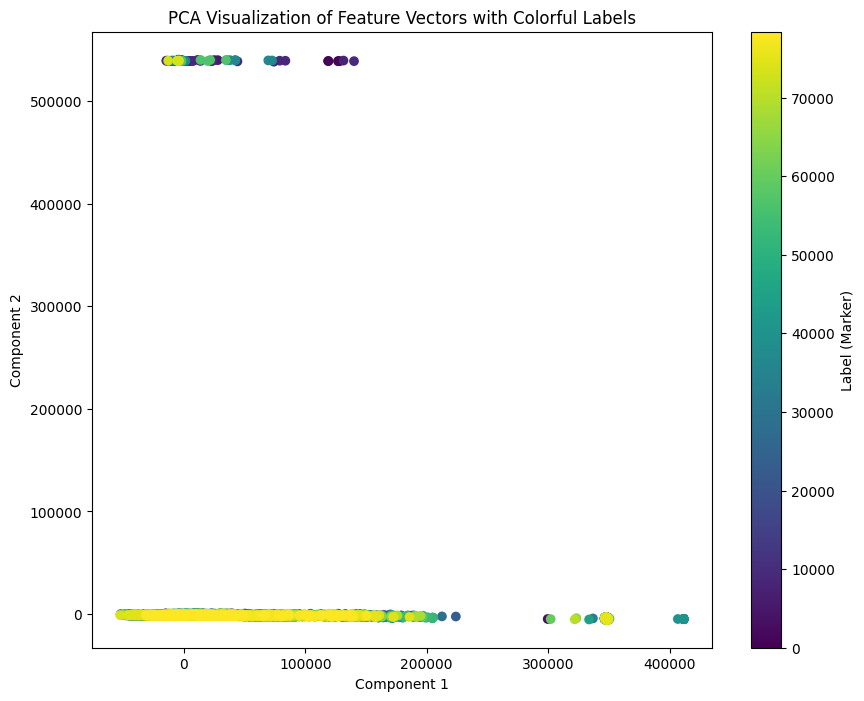

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


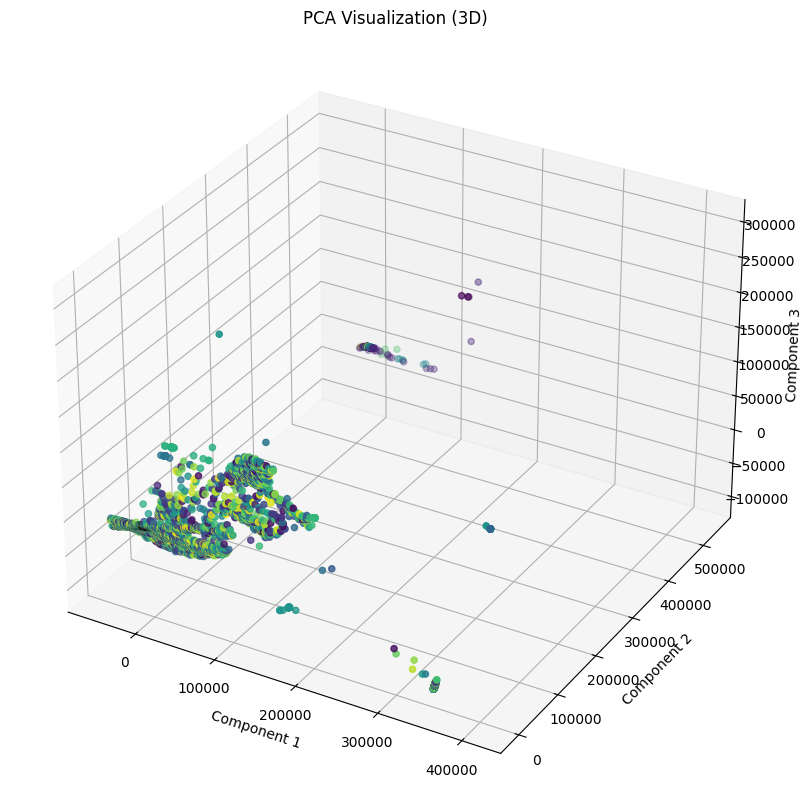

In [14]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [15]:
# Assuming the target variable is in a column named 'target'
# X = data.drop('marker', axis=1)
X = feature_vector_1
y = data['marker']
# y.value_counts()
# #import LabelEncoder
# #le = LabelEncoder()
# #y_encoded = le.fit_transform(y)

In [17]:

# Initialize H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,10 days 20 hours 53 mins
H2O_cluster_timezone:,Asia/Riyadh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,2 months and 6 days
H2O_cluster_name:,H2O_from_python_danish_4c3q4p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.35 Gb
H2O_cluster_total_cores:,128
H2O_cluster_allowed_cores:,128
H2O_cluster_status:,"locked, healthy"


In [18]:
# Combine features and target into a single H2OFrame
data = h2o.H2OFrame(pd.concat([X, y], axis=1))
data


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA10:IH,R1-PM10:I,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PM10:I,R2-PA:ZH,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PM10:I,R3-PA:ZH,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PM10:I,marker
0.553942,-1.11111,-0.307364,-0.847826,-1.22051,-1.13333,0.680825,-0.316417,0.848335,0.669915,0.553897,-1.06818,0.526929,0.722833,0.506401,-0.772157,-0.37558,-0.81712,1.10647,-0.774668,0.683264,0.798766,0.854647,0.663224,0.50632,-0.782009,0.733228,77.8387,0.506448,-0.927711,-0.375687,-0.890244,1.10649,-0.97561,0.693431,0.793268,0.864198,0.679659,0.506497,-0.926829,0.743243,80.9451,0.554265,-1.33607,-0.306332,-1.38053,-1.22158,-1.3305,0.687124,-0.314527,0.857429,0.667933,0.55422,-1.34301,0.729175,b'41'
0.592635,-0.266667,-0.275842,-0.0217391,-1.17831,-0.266667,-0.759709,-0.252698,-0.675709,-0.771011,0.592628,-0.204545,0.607262,-0.74359,0.564876,0.303756,-0.326018,0.273576,-1.21726,0.323765,-0.765876,0.846075,-0.669286,-0.772238,0.564764,0.306587,-0.746501,-1.1416,0.564884,0.156626,-0.32607,0.219512,-1.21689,0.134146,-0.761557,0.841239,-0.67284,-0.771011,0.564949,0.182927,-0.743243,-1.10223,0.593138,-0.503765,-0.274838,-0.651915,-1.17944,-0.501663,-0.773709,-0.250165,-0.676788,-0.778032,0.593023,-0.545599,-0.749467,b'41'
0.615654,0.6,-0.257106,0.826087,-1.15332,0.577778,-0.690534,-0.234041,-0.68434,-0.691839,0.615649,0.681818,0.61696,-0.69475,0.588027,0.784902,-0.306385,0.755196,-1.19107,0.804254,-0.695556,0.869526,-0.67879,-0.687634,0.587904,0.787502,-0.695554,-0.194327,0.588057,0.638554,-0.306446,0.707317,-1.19077,0.634146,-0.692214,0.864551,-0.680247,-0.688185,0.588115,0.670732,-0.692875,-0.137392,0.616149,0.350445,-0.256102,0.0958699,-1.15438,0.348983,-0.700239,-0.231428,-0.682974,-0.699739,0.616032,0.272799,-0.699114,b'41'
0.6146,0.511111,-0.257881,0.73913,-1.1544,0.488889,-0.671117,-0.235318,-0.681874,-0.671133,0.614629,0.590909,0.611832,-0.680098,0.587061,0.742074,-0.307231,0.703466,-1.19228,0.758838,-0.678742,0.866896,-0.673348,-0.666927,0.586906,0.74126,-0.680866,-0.0838512,0.587016,0.590361,-0.307386,0.658537,-1.19183,0.573171,-0.676399,0.862089,-0.675309,-0.672351,0.587074,0.621951,-0.68059,0.00953144,0.615093,0.262834,-0.256905,0.019174,-1.15545,0.239926,-0.684321,-0.232908,-0.678025,-0.67772,0.615045,0.188861,-0.685605,b'41'
0.614192,0.488889,-0.258323,0.717391,-1.15491,0.488889,-0.663835,-0.235898,-0.680641,-0.662607,0.614153,0.568182,0.610018,-0.673993,0.586546,0.733238,-0.307668,0.701566,-1.19279,0.752178,-0.667783,0.866007,-0.672735,-0.659143,0.586424,0.736198,-0.674249,0.0965444,0.586546,0.590361,-0.307756,0.658537,-1.19244,0.573171,-0.667883,0.861166,-0.676543,-0.660171,0.586604,0.621951,-0.674447,0.157938,0.614651,0.262834,-0.257292,0,-1.156,0.239926,-0.678198,-0.233923,-0.676788,-0.665486,0.614569,0.167877,-0.678236,b'41'
0.619768,0.511111,-0.253646,0.73913,-1.14877,0.488889,-0.822816,-0.227803,-0.853268,-0.823386,0.619831,0.590909,0.617448,-0.838828,0.594435,0.799829,-0.300951,0.770062,-1.18385,0.820307,-0.82845,0.8686,-0.848568,-0.818375,0.594309,0.803161,-0.840593,0.403986,0.594438,0.650602,-0.301062,0.719512,-1.18346,0.634146,-0.827251,0.863512,-0.851852,-0.82095,0.59446,0.682927,-0.840295,0.483346,0.620267,0.284737,-0.252643,0.019174,-1.14983,0.261737,-0.842282,-0.225424,-0.85248,-0.826965,0.620219,0.188861,-0.845259,b'41'
0.621706,0.644445,-0.252124,0.869565,-1.14662,0.622222,-0.822816,-0.225859,-0.853268,-0.82095,0.621736,0.727273,0.619541,-0.837607,0.596367,0.867562,-0.29934,0.840249,-1.18163,0.894998,-0.83,0.871045,-0.850446,-0.818866,0.59624,0.874566,-0.841893,0.474045,0.596353,0.722892,-0.299382,0.792683,-1.1813,0.707317,-0.8309,0.866013,-0.853086,-0.822168,0.596408,0.756098,-0.84

In [19]:

# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=42)
train.shape

(62647, 56)

In [20]:

# # Initialize and train AutoML
# aml = H2OAutoML(max_models=50, seed=42)
# aml.train(x=predictors, y=response, training_frame=train)

# Get the best model from AutoML
# best_model = aml.leader


# # Save the best model to disk
# model_path = '/home/danish/Codes/AutoML/H2o'
# h2o.save_model(model=best_model, path=model_path, force=True)



# # Load the saved model 
best_model = h2o.load_model('/home/danish/Codes/AutoML/H2o/ICS_Dataset_3_With_Feature_Eng/StackedEnsemble_AllModels_1_AutoML_7_20240513_130718')



In [21]:


# Make predictions on the test set
# predictions = best_model.predict(test)


In [22]:

# Optionally, you can evaluate the performance
test_metrics = best_model.model_performance(test)
print(test_metrics)


ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1255551416121809
RMSE: 0.3543376096495839
LogLoss: 0.4331292989175151
Null degrees of freedom: 15729
Residual degrees of freedom: 13772
Null deviance: 111143.30827295771
Residual deviance: 13626.247743945023
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
b'1'    b'10'    b'11'    b'12'    b'13'    b'14'    b'15'    b'16'    b'17'    b'18'    b'19'    b'2'    b'20'    b'21'    b'22'    b'23'    b'24'    b'25'    b'26'    b'27'    b'28'    b'29'    b'3'    b'30'    b'35'    b'36'    b'37'    b'38'    b'39'    b'4'    b'40'    b'41'    b'5'    b'6'    b'7

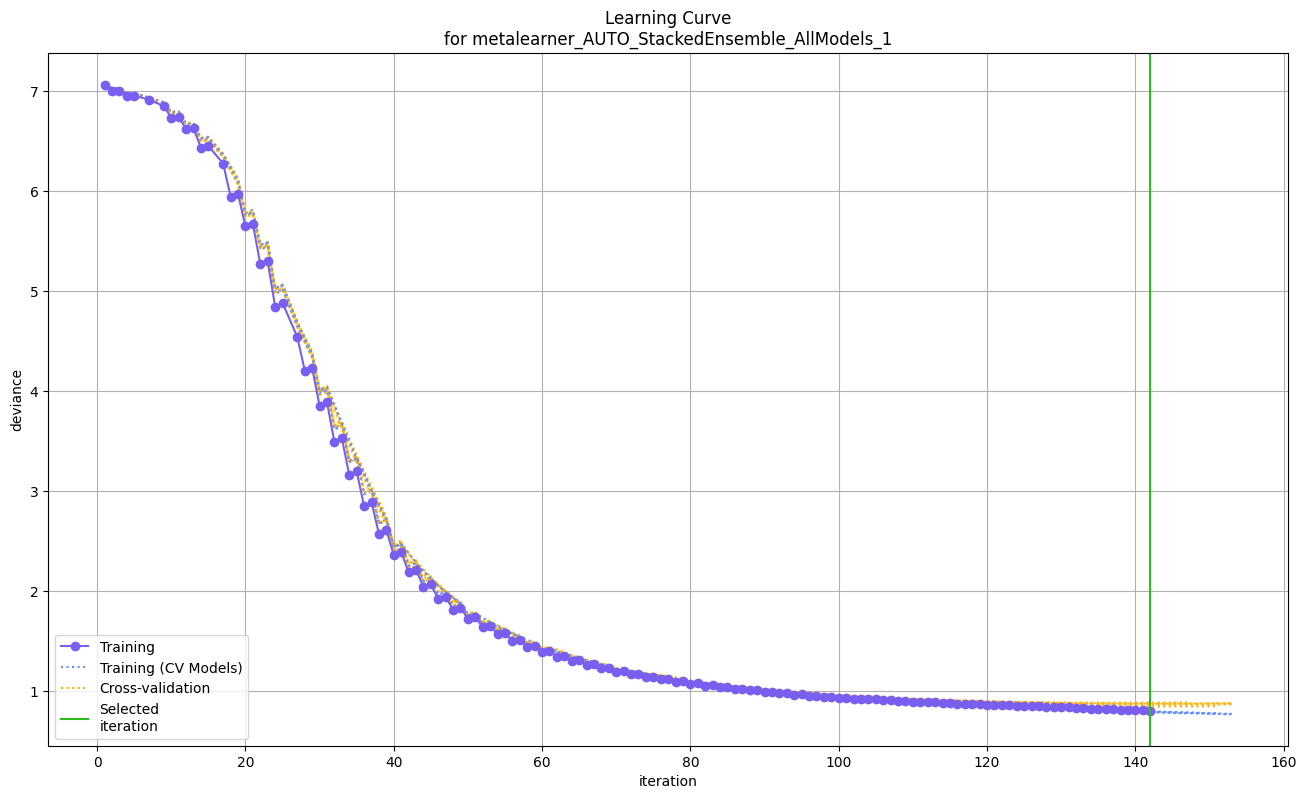

In [23]:
best_model.learning_curve_plot()

In [24]:
predictions = best_model.predict(test)

y_true = test['marker']
y_pred = predictions['predict']

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [25]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train['marker'].as_data_frame())
y_true_ = label_binarizer.transform(test['marker'].as_data_frame())
y_pred_ = label_binarizer.transform(y_pred.as_data_frame())


print(y_true_.shape)
print(y_pred_.shape)# (n_samples, n_classes)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_true_ = le.fit_transform(y_true_)
# y_pred_ = le.fit_transform(y_pred_)


# print(y_true_)
# print(y_pred_)

(15730, 37)
(15730, 37)


/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_d

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


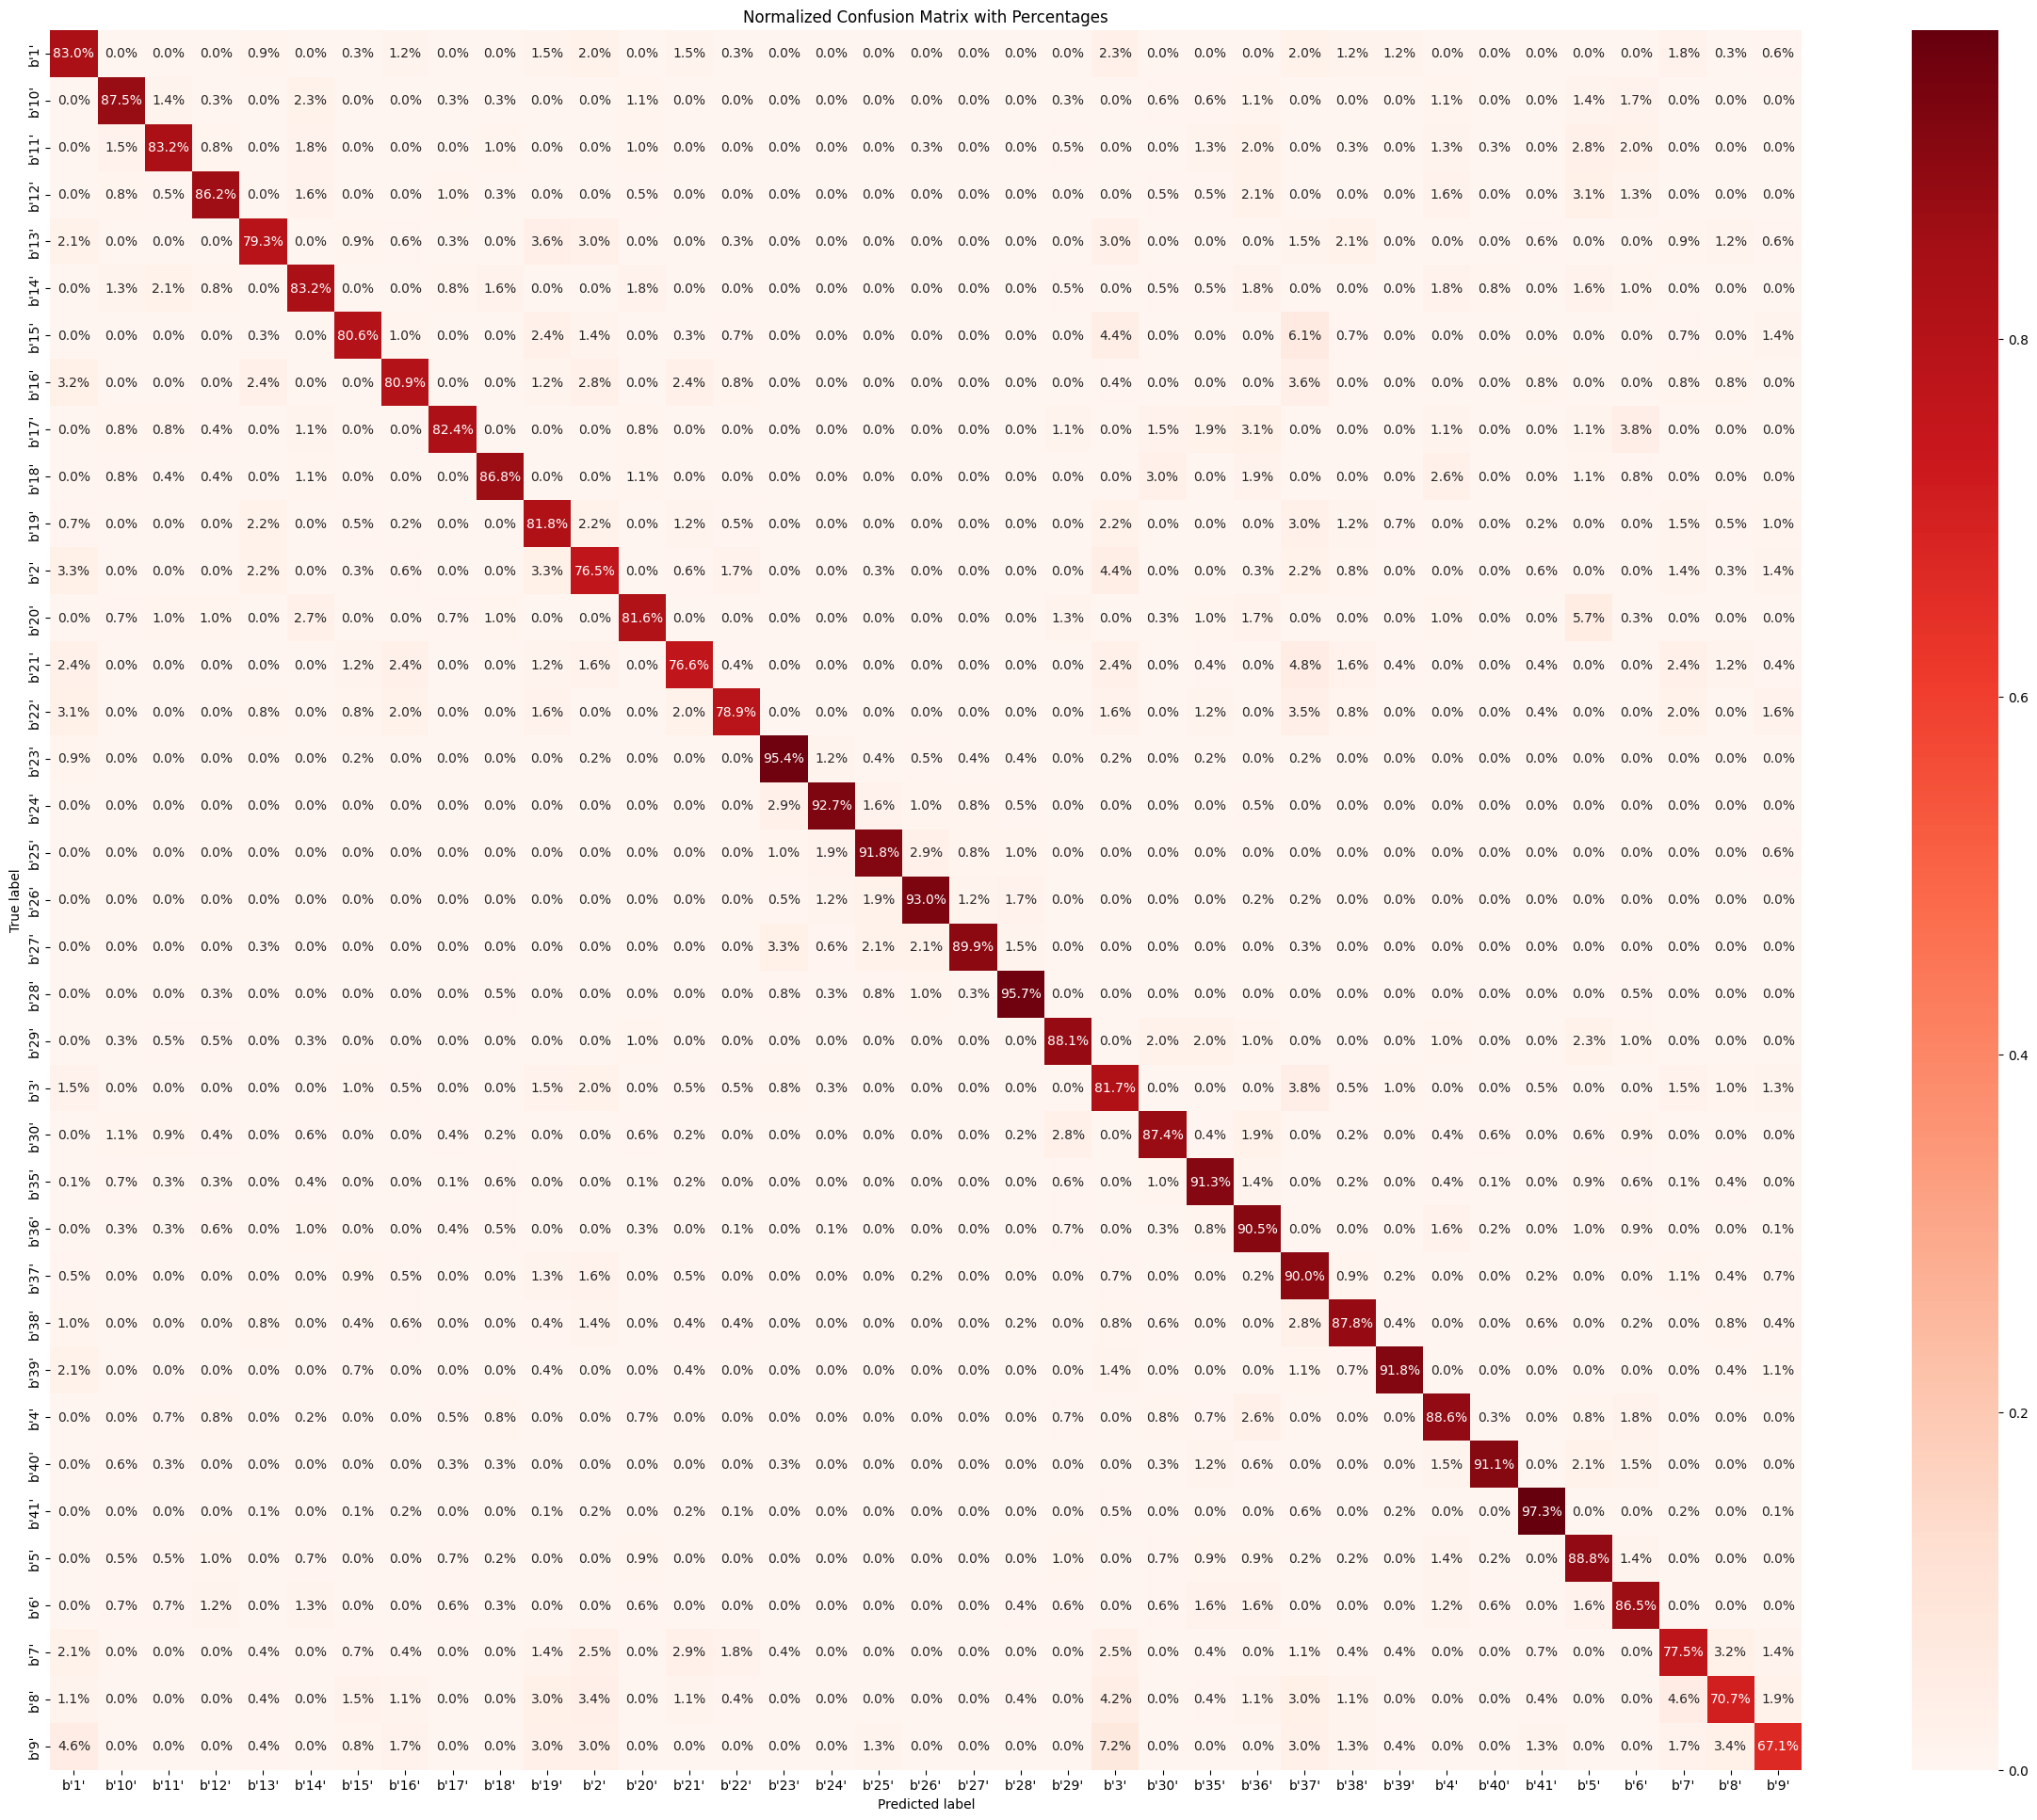

In [26]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

# Example data
classes=np.unique(train['marker'].as_data_frame())



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true_.argmax(axis=1), y_pred_.argmax(axis=1))

# Normalize confusion matrix
cnf_matrix_norm = normalize(cnf_matrix, axis=1, norm='l1')

# Plot confusion matrix with percentages
plt.figure(figsize=(30, 24))
sns.heatmap(cnf_matrix_norm, annot=True, cmap='Reds', fmt='.1%', xticklabels=classes, yticklabels=classes)
plt.title('Normalized Confusion Matrix with Percentages')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [27]:
from sklearn.metrics import classification_report
# Compute classification report
class_report = classification_report(y_true_, y_pred_)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       342
           1       0.87      0.88      0.87       352
           2       0.88      0.83      0.85       392
           3       0.88      0.86      0.87       385
           4       0.87      0.79      0.83       333
           5       0.83      0.83      0.83       387
           6       0.87      0.81      0.84       294
           7       0.83      0.81      0.82       251
           8       0.88      0.82      0.85       262
           9       0.86      0.87      0.86       265
          10       0.80      0.82      0.81       402
          11       0.75      0.76      0.76       361
          12       0.84      0.82      0.83       299
          13       0.80      0.77      0.78       248
          14       0.88      0.79      0.83       256
          15       0.94      0.95      0.94       567
          16       0.93      0.93      0.93       383
    

In [28]:
from pycm import ConfusionMatrix

y_true = y_true['marker'].as_data_frame()
y_true = y_true['marker'].tolist()

y_pred = y_pred['predict'].as_data_frame()
y_pred = y_pred['predict'].tolist()


# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred)
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)

Predict     b'1'        b'10'       b'11'       b'12'       b'13'       b'14'       b'15'       b'16'       b'17'       b'18'       b'19'       b'2'        b'20'       b'21'       b'22'       b'23'       b'24'       b'25'       b'26'       b'27'       b'28'       b'29'       b'3'        b'30'       b'35'       b'36'       b'37'       b'38'       b'39'       b'4'        b'40'       b'41'       b'5'        b'6'        b'7'        b'8'        b'9'        
Actual
b'1'        284         0           0           0           3           0           1           4           0           0           5           7           0           5           1           0           0           0           0           0           0           0           8           0           0           0           7           4           4           0           0           0           0           0           6           1           2           

b'10'       0           308         5           1           0           8     

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_d

In [29]:
from pycm import ConfusionMatrix

y_true = y_true['marker'].as_data_frame()
y_true = y_true['marker'].tolist()

y_pred = y_pred['predict'].as_data_frame()
y_pred = y_pred['predict'].tolist()


# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred)
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)

TypeError: list indices must be integers or slices, not str